In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

In [10]:
from sklearn.datasets import load_iris

data = load_iris()
#print(data.DESCR)
df = pd.DataFrame(data.data,columns=data.feature_names)

In [17]:
X = df
y = data.target

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)
print(f"{X_train.shape} {y_train.shape} {X_test.shape} {y_test.shape}")

(120, 4) (120,) (30, 4) (30,)


In [23]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier

DecisionTreeClassifier()

In [24]:
dt_classifier.fit(X_train,y_train)
dt_classifier

DecisionTreeClassifier()

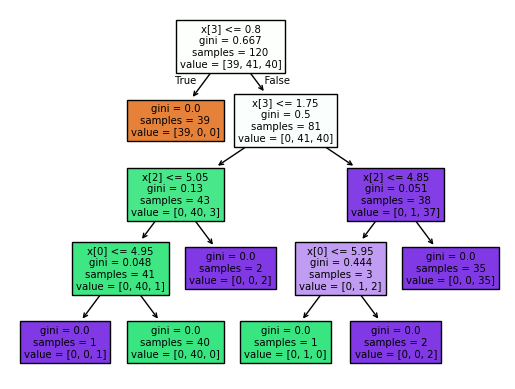

In [28]:
from sklearn import tree
tree.plot_tree(dt_classifier,filled=True)
plt.show()

In [37]:
y_pred = dt_classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9


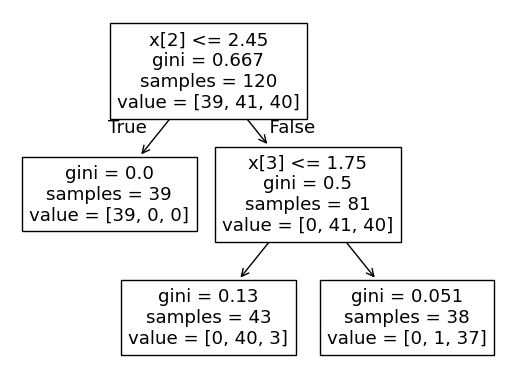

In [39]:
#Post pruning
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=2)
dt_classifier.fit(X_train,y_train)
tree.plot_tree(dt_classifier)
plt.show()

In [41]:
y_pred =dt_classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9333333333333333


In [42]:
from sklearn.metrics import classification_report

report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.82      1.00      0.90         9
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30



In [69]:
#Pre pruning
parameter = {
    'max_depth': [1,2,3,4,5,6],
    'splitter' : ['best','random'],
    'max_features' : ['sqrt','log2','auto'],
    'criterion' : ['gini','entropy','log_loss']
}

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()
grid = GridSearchCV(clf,param_grid=parameter,cv=5,scoring='accuracy',verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.714 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.714 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.714 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.667 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.667 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=random;, score=0.714 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=random;, score=0.714 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=sqrt, splitter=random;, score=0.429 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=sqrt, splitt

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [70]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'splitter': 'best'}
DecisionTreeClassifier(max_depth=3, max_features='log2')
0.9619047619047618


In [71]:
y_pred = grid.best_estimator_.predict(X_test)
print(y_pred)
print(y_test)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]


In [73]:
acc1 = accuracy_score(y_test,y_pred)
print(acc1)

0.9777777777777777
